test orbital motion s
3.5258 == 3.5258?
3.5258 == 3.5258?
3.575799999999872 == 1.55?
test static s
3.5258 == 3.5258?
3.5258 == 3.5258?
3.5258 == 3.5258?
test orbital motion alpha
-220.77828309943703 deg == 7.345 deg?
What kind of model?
Static: True == True?
Orb Mot: False == False?
Orb Mot: False == False?
Check projected velocity (gamma)
0.14181178739576836 1 / yr == 0.3333333 1 / yr?
-38.53449833064719 rad / yr == -0.87266 1 / yr?
38.53475927234651 1 / yr == 0.9346 1 / yr?


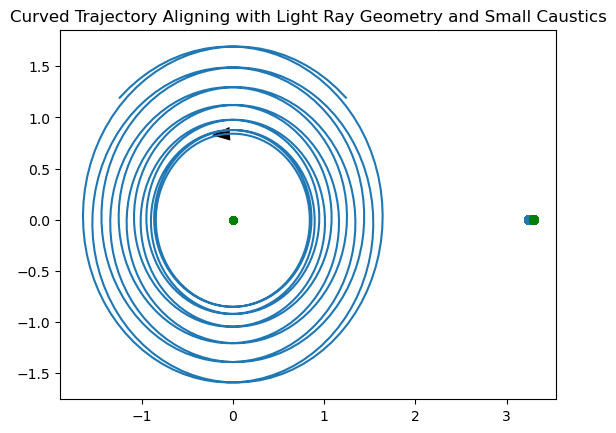

C:\Users\mnkin\anaconda3\Lib\site-packages\MulensModel\magnificationcurve.py:180: UserWarning: A finite source parameter (rho or t_star) is set and no finite-source method is set.
For possible magnification methods see
C:\Users\mnkin\anaconda3\Lib\documents\magnification_methods.pdfor
https://github.com/rpoleski/MulensModel/blob/master/documents/magnification_methods.pdf
  warnings.warn(msg, UserWarning)


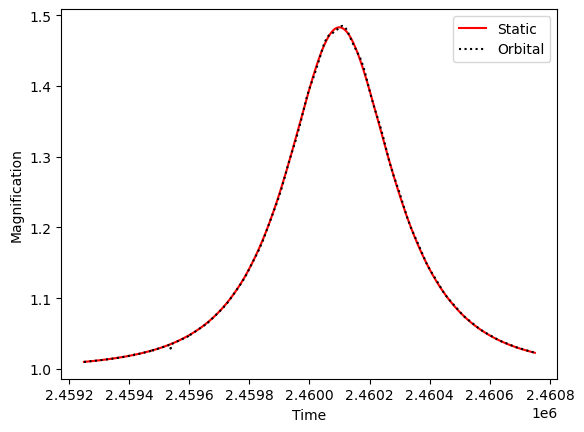

In [1]:
"""
Use case presenting binary lens orbital motion models. Also comparison
with static binary model is provided.
"""
from astropy import units as u
import matplotlib.pyplot as plt
import os.path
import MulensModel as mm


# point lens parameters:
t_0 = 2460100.25
u_0 = 0.84121
t_E = 250 * u.day
rho = 0.36933

# binary lens parameters:
q = 0.0009547511312
alpha_0 = 0.0081289 * u.deg
dalpha_dt = 2207.86412 * u.deg / u.year
s_0 = 3.5258
ds_dt = 0.5 / u.year
params = {'t_0': t_0, 'u_0': u_0, 't_E': t_E, 'rho': rho, 'q': q,
          'alpha': alpha_0, 's': s_0}

# Generate models:
model_static = mm.Model(params)
params['dalpha_dt'] = dalpha_dt
params['ds_dt'] = ds_dt
model_orb = mm.Model(params)
# t_0_kep is not provided hence defaults to t_0

# We can get model exactly the same as model_orb this way:
orb_parameters = model_static.parameters.as_dict().copy()
orb_parameters.update({'ds_dt': ds_dt, 'dalpha_dt': dalpha_dt})
model_orb_2 = mm.Model(parameters=orb_parameters)

dt = 36.525  # This is in days.

# Get the values of parameters in both models:
print('test orbital motion s')
print('{0} == {1}?'.format(model_orb.parameters.s, s_0))
print('{0} == {1}?'.format(model_orb.parameters.get_s(t_0), s_0))
print('{0} == {1}?'.format(model_orb.parameters.get_s(t_0+dt), 1.55))

print('test static s')
print('{0} == {1}?'.format(model_static.parameters.s, s_0))
print('{0} == {1}?'.format(model_static.parameters.get_s(t_0), s_0))
print('{0} == {1}?'.format(model_static.parameters.get_s(t_0+dt), s_0))

print('test orbital motion alpha')
print(
    '{0} == {1}?'.format(
        model_orb.parameters.get_alpha(t_0-dt), 7.345 * u.deg))
# In analogy to s, similar methods for alpha will work.

# Make sure that you know what kind of model you deal with:
print('What kind of model?')
print('Static: {0} == {1}?'.format(model_static.is_static(), True))
print('Orb Mot: {0} == {1}?'.format(model_orb.is_static(), False))
print('Orb Mot: {0} == {1}?'.format(model_orb_2.is_static(), False))

# Print projected orbital velocity
print('Check projected velocity (gamma)')
print(
    '{0} == {1}?'.format(
        model_orb.parameters.gamma_parallel, 0.3333333 / u.year))
print(
    '{0} == {1}?'.format(
        model_orb.parameters.gamma_perp,  -0.87266 / u.year))
# or # -0.87266 u.rad/u.year (the minus sign comes from the definition in
# Skowron et al. 2011).
print('{0} == {1}?'.format(model_orb.parameters.gamma, 0.9346 / u.year))

# Make a nice plot:
plt.figure()
model_orb.plot_caustics(epoch=t_0)
model_orb.plot_caustics(epoch=t_0+dt, c='g', lw=0)  # second caustics are green
model_orb.plot_trajectory()
plt.title('Curved Trajectory Aligning with Light Ray Geometry and Small Caustics')
plt.show()

# Plot those models:
model_static.plot_magnification(
    t_range=[2459250, 2460750], subtract_2460000=False, color='red', 
    label='Static')
model_orb_2.plot_magnification(
    t_range=[2459250, 2460750], subtract_2460000=False, color='black', 
    linestyle=':', label='Orbital')
plt.legend(loc='best')
plt.show()

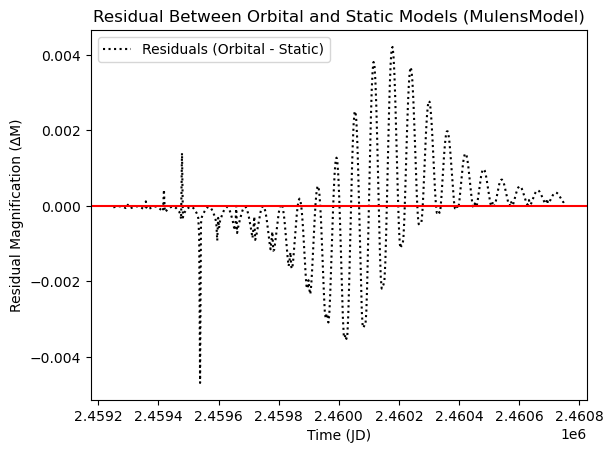

In [2]:
import numpy as np

# Time range for the plot
time_range = np.linspace(2459250, 2460750, 500)

# Get magnifications for both models over the time range
magnification_static = model_static.get_magnification(time_range)
magnification_orbital = model_orb_2.get_magnification(time_range)

# Calculate the residuals (orbital - static)
residuals = magnification_orbital - magnification_static

# Plot the residuals
plt.figure()
plt.plot(time_range, residuals, label='Residuals (Orbital - Static)', color='black', linestyle=':')
plt.axhline(0, color='red')  # Add a reference line at y=0
plt.xlabel('Time (JD)')
plt.ylabel('Residual Magnification (∆M)')
plt.title('Residual Between Orbital and Static Models (MulensModel)')
plt.legend(loc='best')
plt.show()

(0.0, 250.0)

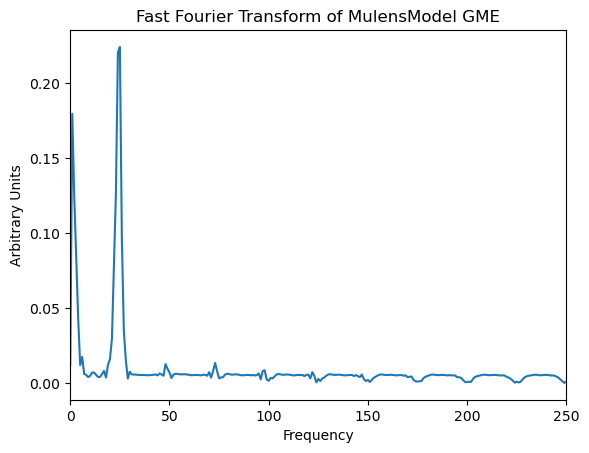

In [3]:
# Fast fourier transform of orbital model to identify peak frequencies
plt.plot(np.abs(np.fft.fft(residuals)))
plt.xlabel("Frequency")
plt.ylabel("Arbitrary Units")
plt.title("Fast Fourier Transform of MulensModel GME")
plt.xlim(0,250)

In [4]:
# Investigation of frequencies to identify peaks; 476 and 24
import pandas as pd
freq = pd.DataFrame(np.abs(np.fft.fft(residuals)))
freq.sort_values(0, ascending=False)[:4]

,0
25,0.224161
475,0.224161
24,0.220486
476,0.220486


In [5]:
# Calculation of period over time interval
1/476*(2460750-2459250)

3.1512605042016806